# Emoji Sentiment Analysis with Tweets_Chinese
        
## step3-EDA & Basic models
### 3.1 data exploring
1. plot the most requent emoji

### 3.2 topic models
1. topic moedel with all emoji --- first galance of emoji meaning
2. topic model with only concerned emojis

### 3.3 word embedding
1. word embedding with only emoji
2. word embedding with both emoji and words

![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTigQWzoYCNiDyrz1BN4WTf2X2k9OZ_yvW-FsmcIMsdS9fppNmh)


In [1]:
# required libraries
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np

from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter

plt.style.use('ggplot')
stop=set(stopwords.words('english'))

import re
from nltk.tokenize import word_tokenize
import gensim
import string

In [2]:
# emoji lists

joy = ['\U0001F600', '\U0001F602', '\U0001F603', '\U0001F604',
          '\U0001F606', '\U0001F607', '\U0001F609', '\U0001F60A',
          '\U0001F60B', '\U0001F60C', '\U0001F60D', '\U0001F60E',
          '\U0001F60F', '\U0001F31E', '\U0000263A', '\U0001F618',
          '\U0001F61C', '\U0001F61D', '\U0001F61B', '\U0001F63A',
          '\U0001F638', '\U0001F639', '\U0001F63B', '\U0001F63C',
          '\U00002764', '\U0001F496', '\U0001F495', '\U0001F601',
          '\U00002665']#joy

anger = ['\U0001F62C', '\U0001F620', '\U0001F610',
          '\U0001F611', '\U0001F620', '\U0001F621', '\U0001F616',
          '\U0001F624', '\U0001F63E']#anger
disgust= ['\U0001F4A9']#disgust
fear = ['\U0001F605', '\U0001F626', '\U0001F627', '\U0001F631',
          '\U0001F628', '\U0001F630', '\U0001F640']#fear
sad = ['\U0001F614', '\U0001F615', '\U00002639', '\U0001F62B',
          '\U0001F629', '\U0001F622', '\U0001F625', '\U0001F62A',
          '\U0001F613', '\U0001F62D', '\U0001F63F', '\U0001F494']#sad
surp = ['\U0001F633', '\U0001F62F', '\U0001F635', '\U0001F632']#surprise

emojilist = {'joy':joy, 'anger':anger, 'disgust':disgust, 'fear':fear, 'sad':sad, 'surprise':surp}
for i in emojilist:
    print('There are {} emoji contains in the cluster {}'.format(len(emojilist[i]), i))
    print(i,emojilist[i])

There are 29 emoji contains in the cluster joy
joy ['😀', '😂', '😃', '😄', '😆', '😇', '😉', '😊', '😋', '😌', '😍', '😎', '😏', '🌞', '☺', '😘', '😜', '😝', '😛', '😺', '😸', '😹', '😻', '😼', '❤', '💖', '💕', '😁', '♥']
There are 9 emoji contains in the cluster anger
anger ['😬', '😠', '😐', '😑', '😠', '😡', '😖', '😤', '😾']
There are 1 emoji contains in the cluster disgust
disgust ['💩']
There are 7 emoji contains in the cluster fear
fear ['😅', '😦', '😧', '😱', '😨', '😰', '🙀']
There are 12 emoji contains in the cluster sad
sad ['😔', '😕', '☹', '😫', '😩', '😢', '😥', '😪', '😓', '😭', '😿', '💔']
There are 4 emoji contains in the cluster surprise
surprise ['😳', '😯', '😵', '😲']


In [3]:
allemoji = joy + anger + disgust + fear + sad + surp
print(len(allemoji))

62


In [4]:
##########
# 3.1 Data Exploring

In [5]:
#load the cleaned data
df = pd.read_csv('tweets_cleaned_drop_zh.csv')

In [6]:
df[['tweets','emojis','c_emojis','type']]

,tweets,emojis,c_emojis,type
0,默契 挑战 ▶ 经历 毫无 默契 几轮 游戏 😂 六个 哪咤 最后 蒙眼 舞蹈 中 ...,▶ 😂 😜,😂 😜,joy
1,节省 网络 存储 存储空间 空间 😂,😂,😂,joy
2,一部 部手机 手机 拯救 乌克兰 克兰 战士 生命 一颗 毫米 卡 在手 手机 机上 喵 评...,😜,😜,joy
3,泰国 泼水 泼水节 好开心 开心 😃,😃,😃,joy
4,没 脱 一下 影片 有人 想 吗 😊,😊,😊,joy
...,...,...,...,...
179920,简 单 😳,😳,😳,surprise
179921,不知 知道 反抗 不知 知道 知道 猪 吃饱 肚子 行 有钱 话 行 能比 强 行 反抗 对...,😯,😯,surprise
179922,竟然 没有 德州 😲,😲,😲,surprise
179923,简 单 😳,😳,😳,surprise


In [7]:
#load the cleaned data

#get the emoji list
df = pd.read_csv('tweets_cleaned_drop_zh.csv')
wordslist = []
for t in df['emojis']:
    t = t.split()
    wordslist += t

wordslist[:3]

['▶', '😂', '😜']

In [8]:
ls = []
count = Counter(wordslist)
allemoji = joy + anger + disgust + fear + sad + surp
for i in allemoji:
    x,y = i,count[i]
    ls.append([x,y])
# x,y = zip(*ls)
# x,y

ls = sorted(ls)
import pandas as pd
fredf = pd.DataFrame(ls,columns=['emoji','count'])
fredf.sort_values(by=['count'],ascending=False, inplace=True)
fredf[:11]

,emoji,count
11,😂,32374
14,😅,30155
36,😡,19257
47,😭,17940
56,😺,16145
21,😍,14115
50,😱,11682
52,😳,11026
3,❤,10216
8,💩,7635


In [9]:
fredf.to_csv('fre_emojis_zh.csv')

findfont: Font family ['Euclid Fraktur'] not found. Falling back to DejaVu Sans.
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128169 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128548 missing from current font.
  font.set_text(s, 0, flags=flags)


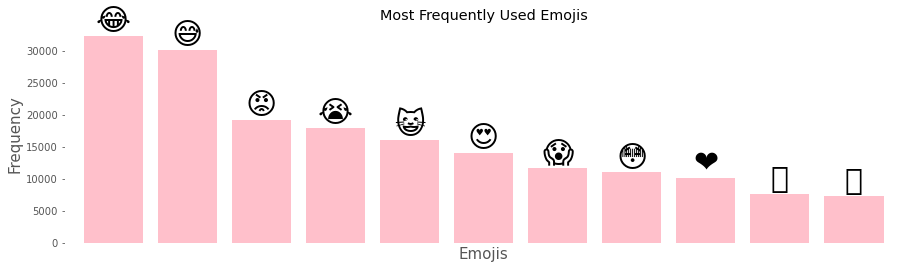

In [10]:
# draw the most frequently used emoji:
from matplotlib.font_manager import FontProperties
prop = FontProperties(fname='/Library/Fonts/Euclid Fraktur.dfont')

freqs = fredf['count'][:11]
labels = fredf['emoji'][:11]

# Plot the figure
plt.figure(figsize=(15, 4))
plt.rcParams['font.family'] = prop.get_family()

ax = pd.Series(freqs).plot(kind='bar', color='pink', width=0.8)
ax.set_title('Most Frequently Used Emojis')
ax.set_ylabel('Frequency', fontsize=15)
ax.set_xlabel('Emojis', fontsize=15)
ax.set_facecolor(color='white')
ax.grid(False)
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False,
)

new_ylim = ax.get_ylim()[1]+30
ax.set_ylim((0, new_ylim))

rects = ax.patches

# Make labels
for rect, label in zip(rects, labels):
    height = rect.get_height()
    plt.annotate(
        label,
        (rect.get_x() + rect.get_width()/2, height+5),
        ha="center",
        va="bottom",
        fontsize=30,
        fontproperties=prop.get_name()
    )

plt.show()

## 3.2 Topic model
1. topic moedel with all emoji --- first galance of emoji meaning
2. topic model with only concerned emojis

In [11]:

######################
##########
# 3.2.1 Topic model with emojis
# prepare emoji list for topic model
emlist = [em.split() for em in df['emojis']]
emlist[:3]

# train LDA model
from gensim.parsing.preprocessing import remove_stopwords
from gensim import corpora
from gensim import models

# dictionary and corpus
vocabs = corpora.Dictionary(emlist)
corpus = [vocabs.doc2bow(item) for item in emlist]

#lda model
%time lda = models.ldamodel.LdaModel(corpus=corpus, id2word=vocabs, num_topics=10)
print(lda.show_topics(-1))
corpus_lda = lda[corpus]
print(corpus_lda[0])

CPU times: user 10.8 s, sys: 52.5 ms, total: 10.8 s
Wall time: 10.9 s
[(0, '0.378*"😆" + 0.247*"🏻" + 0.089*"😃" + 0.050*"😺" + 0.047*"❗" + 0.046*"✌" + 0.044*"👋" + 0.013*"🐧" + 0.012*"🧘" + 0.012*"🐯"'), (1, '0.617*"😂" + 0.127*"🤣" + 0.101*"😘" + 0.023*"\U0001f972" + 0.023*"😐" + 0.021*"🤩" + 0.015*"🤬" + 0.011*"❣" + 0.008*"🍀" + 0.008*"🐰"'), (2, '0.582*"😅" + 0.092*"😲" + 0.041*"♀" + 0.039*"🔥" + 0.036*"😢" + 0.021*"🤦" + 0.016*"🧐" + 0.016*"💦" + 0.014*"👇" + 0.010*"♂"'), (3, '0.428*"😡" + 0.189*"😱" + 0.083*"😨" + 0.070*"😰" + 0.039*"😀" + 0.023*"🙈" + 0.016*"🐱" + 0.015*"😓" + 0.012*"🤪" + 0.012*"💛"'), (4, '0.337*"\U0001f979" + 0.121*"😑" + 0.094*"😌" + 0.087*"🥵" + 0.075*"😬" + 0.067*"😏" + 0.026*"😚" + 0.022*"🤤" + 0.020*"😹" + 0.014*"🤮"'), (5, '0.421*"😳" + 0.160*"🥺" + 0.133*"💕" + 0.065*"😁" + 0.053*"😎" + 0.049*"✨" + 0.023*"\U0001faf6" + 0.016*"🌹" + 0.013*"🔊" + 0.010*"🐶"'), (6, '0.309*"😭" + 0.113*"💙" + 0.112*"😤" + 0.072*"😠" + 0.067*"😄" + 0.046*"🥳" + 0.032*"🥰" + 0.027*"☺" + 0.026*"😉" + 0.018*"🤡"'), (7, '0.165*"😇" + 0.1

In [12]:
#vidualization
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import warnings
warnings.filterwarnings('ignore')#ignore the warning

%time vis_data = gensimvis.prepare(lda, corpus, vocabs, mds='mmds')
pyLDAvis.display(vis_data)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


CPU times: user 6.36 s, sys: 143 ms, total: 6.51 s
Wall time: 9.28 s


In [13]:
###
#only explore our concerned emojis


In [14]:
df[['time','puretext','emojis','c_emojis','type']]

,time,puretext,emojis,c_emojis,type
0,2022-04-16 10:42:22+00:00,默契 挑战 经历 毫无 默契 几轮 游戏 六个 哪咤 最后 蒙眼 舞蹈 中 找回...,▶ 😂 😜,😂 😜,joy
1,2022-04-18 23:59:59+00:00,节省 网络 存储 存储空间 空间,😂,😂,joy
2,2022-04-18 23:59:57+00:00,一部 部手机 手机 拯救 乌克兰 克兰 战士 生命 一颗 毫米 卡 在手 手机 机上 喵 评...,😜,😜,joy
3,2022-04-18 23:59:56+00:00,泰国 泼水 泼水节 好开心 开心,😃,😃,joy
4,2022-04-18 23:59:55+00:00,没 脱 一下 影片 有人 想 吗,😊,😊,joy
...,...,...,...,...,...
179920,2022-05-27 22:41:58+00:00,简 单,😳,😳,surprise
179921,2022-05-27 22:37:56+00:00,不知 知道 反抗 不知 知道 知道 猪 吃饱 肚子 行 有钱 话 行 能比 强 行 反抗 对...,😯,😯,surprise
179922,2022-05-27 22:32:56+00:00,竟然 没有 德州,😲,😲,surprise
179923,2022-05-27 22:32:35+00:00,简 单,😳,😳,surprise


In [15]:
df["c_emojis"]

0         😂 😜
1           😂
2           😜
3           😃
4           😊
         ... 
179920      😳
179921      😯
179922      😲
179923      😳
179924    NaN
Name: c_emojis, Length: 179925, dtype: object

In [16]:
df['emojis']

0         ▶ 😂 😜
1             😂
2             😜
3             😃
4             😊
          ...  
179920        😳
179921        😯
179922        😲
179923        😳
179924    💬 🐺 😟
Name: emojis, Length: 179925, dtype: object

In [17]:
# prepare emoji list for topic model
cels = []
emlist = [em.split() for em in df['emojis']]
for i in emlist:
    e = []
    for emo in i:
        if emo in allemoji:
            e.append(emo)
    cels.append(e)
        
print(emlist[:3])
print(cels[:3])

[['▶', '😂', '😜'], ['😂'], ['😜']]
[['😂', '😜'], ['😂'], ['😜']]


In [18]:
emlist = cels

In [19]:
# train LDA model

from gensim.parsing.preprocessing import remove_stopwords
from gensim import corpora
from gensim import models

# dictionary and corpus
vocabs = corpora.Dictionary(emlist)
corpus = [vocabs.doc2bow(item) for item in emlist]

#lda model
%time lda = models.ldamodel.LdaModel(corpus=corpus, id2word=vocabs, num_topics=6)
print(lda.show_topics(-1))
corpus_lda = lda[corpus]
print(corpus_lda[0])

CPU times: user 9.4 s, sys: 26.1 ms, total: 9.43 s
Wall time: 9.45 s
[(0, '0.312*"😭" + 0.259*"❤" + 0.118*"😵" + 0.073*"😠" + 0.044*"💖" + 0.037*"😖" + 0.034*"😜" + 0.027*"😉" + 0.026*"😀" + 0.024*"😢"'), (1, '0.715*"😂" + 0.109*"😋" + 0.089*"😆" + 0.066*"😲" + 0.021*"😝" + 0.000*"😳" + 0.000*"💩" + 0.000*"😃" + 0.000*"😯" + 0.000*"😉"'), (2, '0.236*"😊" + 0.191*"😑" + 0.150*"😌" + 0.140*"😁" + 0.106*"😏" + 0.076*"☺" + 0.028*"😓" + 0.024*"♥" + 0.020*"💔" + 0.019*"😛"'), (3, '0.517*"😘" + 0.283*"😇" + 0.051*"😺" + 0.048*"😾" + 0.040*"😫" + 0.032*"🌞" + 0.016*"😿" + 0.012*"☹" + 0.000*"😍" + 0.000*"😯"'), (4, '0.420*"😅" + 0.259*"💩" + 0.104*"💕" + 0.070*"😄" + 0.048*"😰" + 0.041*"😎" + 0.029*"😯" + 0.014*"😻" + 0.012*"😹" + 0.002*"😸"'), (5, '0.261*"😳" + 0.228*"😡" + 0.212*"😍" + 0.100*"😱" + 0.091*"😤" + 0.044*"😨" + 0.034*"😬" + 0.020*"😐" + 0.009*"😩" + 0.000*"💩"')]
[(0, 0.38888618), (1, 0.38889062), (2, 0.055555794), (3, 0.0555558), (4, 0.055555794), (5, 0.055555794)]


In [20]:
#vidualization
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import warnings
warnings.filterwarnings('ignore')#ignore the warning

%time vis_data = gensimvis.prepare(lda, corpus, vocabs, mds='mmds')
pyLDAvis.display(vis_data)

CPU times: user 5.32 s, sys: 33.6 ms, total: 5.35 s
Wall time: 5.5 s


In [21]:
# get the top 10 emoji related with each topic
my_dict = {'Topic_' + str(i): [token for token, score in lda.show_topic(i, topn=10)] for i in range(0, lda.num_topics)}
for i in range(6):
    key = 'Topic_' + str(i)
    print('Top 10 related emoji in', key)
    print(my_dict[key])
    
# not very satisfying

Top 10 related emoji in Topic_0
['😭', '❤', '😵', '😠', '💖', '😖', '😜', '😉', '😀', '😢']
Top 10 related emoji in Topic_1
['😂', '😋', '😆', '😲', '😝', '😳', '💩', '😃', '😯', '😉']
Top 10 related emoji in Topic_2
['😊', '😑', '😌', '😁', '😏', '☺', '😓', '♥', '💔', '😛']
Top 10 related emoji in Topic_3
['😘', '😇', '😺', '😾', '😫', '🌞', '😿', '☹', '😍', '😯']
Top 10 related emoji in Topic_4
['😅', '💩', '💕', '😄', '😰', '😎', '😯', '😻', '😹', '😸']
Top 10 related emoji in Topic_5
['😳', '😡', '😍', '😱', '😤', '😨', '😬', '😐', '😩', '💩']


In [22]:
# e-LDA
from gensim.models import EnsembleLda
emlist = cels
# dictionary and corpus
vocabs = corpora.Dictionary(emlist)
corpus = [vocabs.doc2bow(item) for item in emlist]

# Ensemble LDA model
elda = EnsembleLda(corpus=corpus, id2word=vocabs, num_topics=12, num_models=3)


In [23]:
elda.print_topics()

[(0,
  '0.913*"😅" + 0.011*"😤" + 0.010*"😭" + 0.007*"❤" + 0.005*"😬" + 0.005*"😡" + 0.005*"😱" + 0.004*"😂" + 0.004*"😰" + 0.003*"😧"'),
 (1,
  '0.865*"😂" + 0.033*"😅" + 0.024*"😲" + 0.013*"😡" + 0.012*"😢" + 0.011*"😐" + 0.008*"😍" + 0.005*"😆" + 0.003*"😨" + 0.003*"💩"'),
 (2,
  '0.570*"😭" + 0.097*"💩" + 0.073*"😋" + 0.072*"😊" + 0.041*"😬" + 0.025*"😡" + 0.015*"💔" + 0.014*"😢" + 0.013*"😱" + 0.010*"💕"'),
 (3,
  '0.478*"😺" + 0.154*"😄" + 0.075*"😆" + 0.045*"😁" + 0.043*"😎" + 0.025*"😀" + 0.023*"😃" + 0.020*"😤" + 0.020*"😏" + 0.015*"😛"'),
 (4,
  '0.424*"😡" + 0.190*"😤" + 0.161*"💕" + 0.029*"🙀" + 0.028*"😩" + 0.026*"😯" + 0.025*"😱" + 0.022*"😑" + 0.022*"😵" + 0.019*"😺"'),
 (5,
  '0.574*"😱" + 0.088*"💖" + 0.087*"😏" + 0.057*"😖" + 0.021*"😫" + 0.017*"😓" + 0.013*"❤" + 0.012*"😻" + 0.010*"😭" + 0.010*"😡"')]

In [24]:
import re
k = 1
for i,j in elda.print_topics():
    x = re.findall(r'"(.*?)"', str(j))
    z = ' '.join(x)
    print('Topic{}'.format(k),z)
    k += 1

Topic1 😅 😤 😭 ❤ 😬 😡 😱 😂 😰 😧
Topic2 😂 😅 😲 😡 😢 😐 😍 😆 😨 💩
Topic3 😭 💩 😋 😊 😬 😡 💔 😢 😱 💕
Topic4 😺 😄 😆 😁 😎 😀 😃 😤 😏 😛
Topic5 😡 😤 💕 🙀 😩 😯 😱 😑 😵 😺
Topic6 😱 💖 😏 😖 😫 😓 ❤ 😻 😭 😡


In [25]:
# refer to https://medium.com/@abhi_pawar/topic-modelling-using-ensemble-lda-71d2a78666fc

### 3.3 word embedding
1. word embedding with only emoji
2. word embedding with both emoji and words

#### 3.3.1 Word embedding model with only emojis

(1) All emojis

In [26]:
# 3.3.1 Word embedding model with emojis
# all emojis
emlist = [em.split() for em in df['emojis']]
emlist[:3]

[['▶', '😂', '😜'], ['😂'], ['😜']]

In [27]:
from gensim.models import Word2Vec
#*************reported*********
# set model parameters
num_features = 60    # Word vector dimensionality                  
min_word_count = 100    # Minimum word count                     
context = 5         # Context window size 
sg = 0               # skipgram=1, cbow=0  

# train the model
%time model_emoall = Word2Vec(emlist, vector_size=num_features, window=context, min_count=min_word_count, sg=sg)

CPU times: user 1.79 s, sys: 30.4 ms, total: 1.82 s
Wall time: 1.17 s


In [28]:
#*************reported*********
list = allemoji
for i in list:
    print('the most similar words to '+i+' are:')
    print(model_emoall.wv.most_similar(i))
    print('\n')


the most similar words to 😀 are:
[('🙃', 0.7873855233192444), ('😃', 0.7479378581047058), ('🦠', 0.640647292137146), ('😿', 0.592383623123169), ('💊', 0.556389570236206), ('🔪', 0.5264793038368225), ('💤', 0.5066675543785095), ('\U0001fa96', 0.49533575773239136), ('🦶', 0.4727729558944702), ('👹', 0.45792365074157715)]


the most similar words to 😂 are:
[('🤣', 0.8338902592658997), ('🤝', 0.7496839165687561), ('😅', 0.697167158126831), ('👏', 0.6355311870574951), ('👍', 0.5953149199485779), ('🤪', 0.5826048254966736), ('🙏', 0.5521952509880066), ('✌', 0.41503143310546875), ('🏨', 0.3933602571487427), ('🥵', 0.37235569953918457)]


the most similar words to 😃 are:
[('😀', 0.7479379177093506), ('🙃', 0.7454048991203308), ('🦶', 0.7439441084861755), ('😛', 0.588795006275177), ('🔒', 0.5282037854194641), ('☀', 0.510282039642334), ('😿', 0.5002303719520569), ('🐶', 0.4914514720439911), ('💊', 0.4853900671005249), ('😸', 0.45812514424324036)]


the most similar words to 😄 are:
[('😕', 0.5913957357406616), ('🔗', 0.55752

In [29]:
posit = (['😂', '😅'],['😅', '👍'],['🙃', '😅'],['💩', '😡'],['😀','👏'],['🎉','😆'],['😘', '♥'])
negat = (['😅', '👍'],['💋', '♥'],['😘', '♥'])

In [30]:
#*************reported*********
# analog task
for i in posit:
    print('{}+{}=?'.format(i[0],i[1]))
    print(model_emoall.wv.most_similar(positive=i)[:3])
    print()

for i in negat:
    print('{}-{}=?'.format(i[0],i[1]))
    print(model_emoall.wv.most_similar(negative=i)[:3])
    print()

😂+😅=?
[('🤣', 0.8153877258300781), ('🤝', 0.8039407134056091), ('👏', 0.6794406175613403)]

😅+👍=?
[('🤝', 0.8553330898284912), ('👏', 0.8296130895614624), ('🤣', 0.738480806350708)]

🙃+😅=?
[('😀', 0.6363059878349304), ('🤝', 0.620185375213623), ('😂', 0.578642725944519)]

💩+😡=?
[('👎', 0.8597309589385986), ('🐎', 0.8537186980247498), ('🚘', 0.8050117492675781)]

😀+👏=?
[('🤝', 0.7928808927536011), ('👍', 0.7326189875602722), ('🙏', 0.675881564617157)]

🎉+😆=?
[('🎂', 0.550155758857727), ('🍀', 0.5165693759918213), ('💝', 0.48833051323890686)]

😘+♥=?
[('🎂', 0.6076436638832092), ('🤟', 0.5871448516845703), ('🌙', 0.5840895771980286)]

😅-👍=?
[('😼', 0.36217543482780457), ('🦊', 0.2973279654979706), ('😣', 0.286893367767334)]

💋-♥=?
[('🤮', 0.23355433344841003), ('🥴', 0.20636489987373352), ('👹', 0.2042149305343628)]

😘-♥=?
[('👹', 0.1686173677444458), ('🤡', 0.1681564897298813), ('🔪', 0.16678594052791595)]



In [31]:
# only print answers
for i in posit:
    print(model_emoall.wv.most_similar(positive=i)[0][0])
    print()
print('----')
for i in negat:
    print(model_emoall.wv.most_similar(negative=i)[0][0])
    print()

🤣

🤝

😀

👎

🤝

🎂

🎂

----
😼

🤮

👹



***(2). concerned emojis***

In [32]:
#####
# only concerned emojis
emlist = cels

In [33]:

from gensim.models import Word2Vec
# set model parameters
num_features = 50    # Word vector dimensionality                  
min_word_count = 50    # Minimum word count                     
context = 5           # Context window size 
sg = 0                # skipgram=1, cbow=0  

# train the model
%time model_emoall = Word2Vec(emlist, vector_size=num_features, window=context, min_count=min_word_count, sg=sg)
# 6 10 5 1 nice

CPU times: user 1.38 s, sys: 69.2 ms, total: 1.45 s
Wall time: 933 ms


In [34]:
list = allemoji
for i in list:
    print('the most similar words to '+i+' are:')
    print(model_emoall.wv.most_similar(i)[:3])
    print('\n')

the most similar words to 😀 are:
[('😃', 0.8145706653594971), ('😛', 0.6994215846061707), ('😿', 0.6873235702514648)]


the most similar words to 😂 are:
[('😅', 0.4898894429206848), ('😡', 0.4028369188308716), ('😇', 0.40143242478370667)]


the most similar words to 😃 are:
[('😀', 0.8145706653594971), ('😛', 0.669235110282898), ('😿', 0.5675870776176453)]


the most similar words to 😄 are:
[('😕', 0.7662083506584167), ('😧', 0.5833814740180969), ('😺', 0.5517849326133728)]


the most similar words to 😆 are:
[('😝', 0.5360907912254333), ('♥', 0.5356650352478027), ('💕', 0.4919772446155548)]


the most similar words to 😇 are:
[('😀', 0.45508694648742676), ('😨', 0.4398861229419708), ('😳', 0.42848533391952515)]


the most similar words to 😉 are:
[('☺', 0.6532633900642395), ('😤', 0.5881985425949097), ('😏', 0.449627548456192)]


the most similar words to 😊 are:
[('♥', 0.5262488126754761), ('😺', 0.5068758130073547), ('😥', 0.47627973556518555)]


the most similar words to 😋 are:
[('😘', 0.5695501565933228), (

In [35]:

for i in (['😂', '😅'],['💩', '😡'],['😀','💕'],['😉','😆']):
    print('{}+{}=?'.format(i[0],i[1]))
    print(model_emoall.wv.most_similar(positive=i)[0])
    print()

for i in (['😅', '😂'],['😘', '♥']):
    print('{}-{}=?'.format(i[0],i[1]))
    print(model_emoall.wv.most_similar(negative=i)[0])
    print()

😂+😅=?
('😇', 0.4684973955154419)

💩+😡=?
('😿', 0.7362484931945801)

😀+💕=?
('😃', 0.5963021516799927)

😉+😆=?
('☺', 0.5697038173675537)

😅-😂=?
('😫', 0.030660292133688927)

😘-♥=?
('😓', -0.02217799983918667)



### Analogy Tasks on objections
the results are not very satisfying
our model performs better for emotional emojis representing
v.s. emoji2vec


In [36]:
################
# analogy tasks v.s. emoji2vec
emlist = [em.split() for em in df['emojis']]
emlist[:3]
from gensim.models import Word2Vec
# set model parameters
num_features = 50    # Word vector dimensionality                  
min_word_count = 5    # Minimum word count                     
context = 5         # Context window size 
sg = 0               # skipgram=1, cbow=0  

# train the model
%time model_emoall = Word2Vec(emlist, vector_size=num_features, window=context, min_count=min_word_count, sg=sg)



CPU times: user 1.82 s, sys: 25.9 ms, total: 1.84 s
Wall time: 1.15 s


In [37]:
model_emoall.wv.key_to_index.keys()# don't run, show the key

dict_keys(['😂', '😅', '😡', '🏻', '😭', '😺', '👋', '😍', '😱', '😳', '❤', '💩', '😤', '🤣', '😖', '😘', '\U0001f979', '🥺', '💕', '😆', '👍', '😋', '🙏', '💦', '😄', '😠', '😑', '😊', '😏', '😨', '😜', '😬', '😇', '💖', '😎', '😌', '😰', '😵', '🥰', '😁', '🔥', '👏', '😐', '💗', '👇', '😢', '🤝', '😉', '💫', '🤪', '🤭', '🥵', '✨', '💙', '😝', '‼', '🤤', '😃', '🙈', '😀', '😲', '♥', '🤢', '❓', '🤔', '☺', '➕', '💓', '🥳', '\U0001f972', '😈', '👉', '🐍', '😦', '😩', '😛', '🤩', '♀', '❗', '📣', '💪', '😯', '😫', '😔', '😹', '😓', '🍆', '🤗', '🤬', '🎉', '🌹', '👊', '🐶', '🐔', '🤜', '✌', '🏽', '😻', '🙀', '🧡', '🌞', '💔', '🉑', '🤦', '😿', '👹', '😚', '💚', '🐰', '🤨', '💰', '🙄', '🍃', '🐻', '♂', '💥', '🌸', '🤮', '✈', '⚠', '\U0001fae3', '\U0001fae0', '🔞', '💜', '💞', '😥', '🧐', '🙃', '\U0001faf6', '🤡', '😾', '👴', '💛', '🐥', '⬇', '😣', '🙉', '🐿', '👅', '🏼', '😮', '🍑', '💢', '😧', '👀', '🎁', '🤫', '🐱', '💋', '💘', '🔗', '🦶', '🤯', '💎', '⚡', '🎂', '❣', '🐺', '✅', '\U0001fae2', '🌿', '🥴', '☀', '💯', '💝', '🆘', '👌', '🌟', '🤧', '👈', '🖕', '🦠', '💨', '😼', '🍼', '🐷', '🚘', '🤍', '🏿', '🤷', '➡', '🌙', '🌈', '🧸', '🈶', '💀', '👨', 

In [38]:
# for non-emotion-related emojis, the results are not very satisfying
# a = ['👑','💵','💵']
# b = ['🙍‍♂️','🇺🇸','🇺🇸']
# c = ['🧑','🙎','🙎']
# 🧑
# for i in range(3):
#     print('{} - {} + {} = '.format(a[i],b[i],c[i]))
#     print(model_emoall.wv.most_similar(positive=[a[i],c[i]], negative = b[i]))
#     print()
    
print(model_emoall.wv.most_similar(positive=['👑','👩'], negative = '👨'))
print(model_emoall.wv.most_similar(positive=['🕶','🌧'], negative = '🔆'))

[('👔', 0.6610939502716064), ('🛒', 0.6598249673843384), ('🍆', 0.6561222076416016), ('🐾', 0.6543942093849182), ('💌', 0.6373053789138794), ('🥛', 0.6303721070289612), ('➡', 0.6284928321838379), ('🍟', 0.6262401938438416), ('🐮', 0.6217307448387146), ('🈚', 0.6095597743988037)]
[('🚿', 0.7648938894271851), ('©', 0.7512132525444031), ('🌋', 0.7344501614570618), ('🐙', 0.705219566822052), ('🩹', 0.7017755508422852), ('🛏', 0.7017070055007935), ('🌃', 0.6942530274391174), ('▫', 0.6927881836891174), ('⚪', 0.6920067071914673), ('🦟', 0.6878176927566528)]


#### 3.3.2 emojis + text
***emojis+text***

In [39]:
##################

In [40]:
# 3.3.2 Word embedding model with emojis&text

In [50]:
# emojis+tweets
emlist = [em.split() for em in df['tweets']]
emlist[1]

['节省', '网络', '存储', '存储空间', '空间', '😂']

In [51]:
from gensim.models import Word2Vec
# set model parameters
#*************reported*********
num_features = 300    # Word vector dimensionality                  
min_word_count = 100    # Minimum word count                     
context = 5           # Context window size 
sg = 1                # cbow=0  ### skip gram shows better results

# train the model
%time model_emotext = Word2Vec(emlist, vector_size=num_features, window=context, min_count=min_word_count, sg=sg)

CPU times: user 1min 23s, sys: 379 ms, total: 1min 23s
Wall time: 28.4 s


In [52]:
#*************reported*********
list = allemoji
for i in list:
    print('the most similar words to '+i+' are:')
    print(model_emotext.wv.most_similar(i,topn=30))
    print('\n')# results are intuitive

the most similar words to 😀 are:
[('电子', 0.3857073187828064), ('大增', 0.3797316551208496), ('😃', 0.3610801100730896), ('🙃', 0.35259270668029785), ('😿', 0.3318844139575958), ('监控', 0.3264470100402832), ('烟', 0.3199348747730255), ('二战', 0.3161452114582062), ('增大', 0.3070144057273865), ('迷', 0.2940477430820465), ('🔪', 0.2920302450656891), ('据说', 0.2916037440299988), ('😛', 0.28223156929016113), ('负责', 0.2818830907344818), ('樱花', 0.28180697560310364), ('🦠', 0.28017911314964294), ('男女', 0.2796424627304077), ('💊', 0.2751380503177643), ('德州', 0.264889121055603), ('救', 0.2644169330596924), ('几年', 0.2642378509044647), ('华人', 0.26025524735450745), ('算了', 0.25802260637283325), ('感谢', 0.2570163905620575), ('一行', 0.2534213662147522), ('子女', 0.25149253010749817), ('平等', 0.25039368867874146), ('顺便', 0.249922975897789), ('😁', 0.24967098236083984), ('参加', 0.2493816763162613)]


the most similar words to 😂 are:
[('南极', 0.4719521105289459), ('做到', 0.4268992245197296), ('🤣', 0.40126487612724304), ('先觉', 0.3

In [53]:
# analog task
#*************reported*********
for i in posit:
    print('{}+{}=?'.format(i[0],i[1]))
    print(model_emotext.wv.most_similar(positive=i,topn = 20))
    print()

for i in negat:
    print('{}-{}=?'.format(i[0],i[1]))
    print(model_emotext.wv.most_similar(negative=i,topn = 20))
    print()

😂+😅=?
[('南极', 0.44030773639678955), ('实话', 0.40929627418518066), ('🤣', 0.408311665058136), ('先觉', 0.403454452753067), ('帝国', 0.4009941816329956), ('外扬', 0.3969477117061615), ('先知先觉', 0.3915858864784241), ('家丑', 0.3875936269760132), ('文文', 0.3875783383846283), ('偷着乐', 0.38738974928855896), ('做到', 0.38505592942237854), ('逗', 0.3805185556411743), ('权利', 0.37788131833076477), ('先知', 0.3767818808555603), ('围观', 0.37569624185562134), ('价值', 0.37306591868400574), ('挖出', 0.3713230490684509), ('😹', 0.37101683020591736), ('经济学', 0.36527925729751587), ('口上', 0.3649950921535492)]

😅+👍=?
[('👏', 0.47719207406044006), ('周期', 0.4693171977996826), ('🤝', 0.46266970038414), ('口上', 0.4329892694950104), ('权利', 0.42890217900276184), ('帝国', 0.425296425819397), ('剥夺', 0.41367706656455994), ('据说', 0.40181323885917664), ('枪口上', 0.397940993309021), ('偷着乐', 0.3915456235408783), ('价值', 0.38503047823905945), ('🙏', 0.3834379315376282), ('枪口', 0.37965723872184753), ('经济学', 0.3795047402381897), ('文文', 0.37448781728744

In [45]:
## test cbow
from gensim.models import Word2Vec
# set model parameters
num_features = 300    # Word vector dimensionality                  
min_word_count = 100    # Minimum word count                     
context = 5           # Context window size 
sg = 0                # cbow=0  

# train the model
%time model_emotext = Word2Vec(emlist, vector_size=num_features, window=context, min_count=min_word_count, sg=sg)

CPU times: user 28.3 s, sys: 336 ms, total: 28.7 s
Wall time: 9.93 s


In [46]:
list = allemoji
for i in list:
    print('the most similar words to '+i+' are:')
    print(model_emotext2.wv.most_similar(i,topn = 20))
    print('\n')

the most similar words to 😀 are:
[('电子', 0.535215437412262), ('🙃', 0.5159267783164978), ('大增', 0.5094165205955505), ('😃', 0.46744856238365173), ('增大', 0.4608081579208374), ('负责', 0.4451211094856262), ('烟', 0.43577367067337036), ('\U0001fa96', 0.42840710282325745), ('监控', 0.4278363287448883), ('小伙', 0.40038996934890747), ('🔪', 0.3998406231403351), ('人间', 0.39688462018966675), ('🦠', 0.3750796616077423), ('伙伴', 0.3560374081134796), ('美人儿', 0.34948989748954773), ('小伙伴', 0.34809166193008423), ('😛', 0.3430083394050598), ('花钱', 0.3413132429122925), ('💊', 0.338201105594635), ('子女', 0.33580464124679565)]


the most similar words to 😂 are:
[('😅', 0.5528998970985413), ('做到', 0.3482600450515747), ('丑', 0.32006019353866577), ('似乎', 0.3174063563346863), ('挖出', 0.30254197120666504), ('南极', 0.2978498041629791), ('😑', 0.2831781804561615), ('容易', 0.2793915867805481), ('对对', 0.27661311626434326), ('概念', 0.2761772871017456), ('看得', 0.2748245894908905), ('好笑', 0.27165719866752625), ('炸', 0.2689615786075592

In [47]:
# results are similar
for i in posit:
    print('{}+{}=?'.format(i[0],i[1]))
    print(model_emotext2.wv.most_similar(positive=i))
    print()

for i in negat:
    print('{}-{}=?'.format(i[0],i[1]))
    print(model_emotext2.wv.most_similar(negative=i))
    print()

😂+😅=?
[('对对', 0.3655748963356018), ('智商', 0.35177725553512573), ('丑', 0.34466344118118286), ('价值', 0.33670270442962646), ('😑', 0.3331407308578491), ('水平', 0.3326255679130554), ('瞎', 0.3277873992919922), ('看得', 0.30925312638282776), ('😆', 0.302206814289093), ('做到', 0.2987566292285919)]

😅+👍=?
[('👏', 0.5642122030258179), ('🤝', 0.5123900771141052), ('😂', 0.46208852529525757), ('🙏', 0.4179688096046448), ('一路', 0.3832034468650818), ('价值', 0.3632866144180298), ('平安', 0.3484223484992981), ('厉害', 0.34473738074302673), ('祖宗', 0.3297300338745117), ('小伙', 0.3281899392604828)]

🙃+😅=?
[('😀', 0.4538283050060272), ('智商', 0.4450661540031433), ('😃', 0.4261718988418579), ('😂', 0.40081915259361267), ('😁', 0.37389183044433594), ('毕竟', 0.356381893157959), ('真不', 0.34537696838378906), ('瞎', 0.34236130118370056), ('怀疑', 0.32359805703163147), ('包子', 0.32206010818481445)]

💩+😡=?
[('👎', 0.4874337315559387), ('屎', 0.4502533972263336), ('🖕', 0.4290504455566406), ('命', 0.4128126800060272), ('大便', 0.391486883163452

In [63]:
# visualization
import emoji
keys = ['😀','😘','😡','😂','😅']
embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    try:
        for similar_word, _ in model_emotext.wv.most_similar(word, topn=50):
            if similar_word not in emoji.UNICODE_EMOJI['en'] and len(words)<15:
                words.append(similar_word)# most similar 10 text tokens
                embeddings.append(model_emotext.wv[similar_word])
        embedding_clusters.append(embeddings)
        word_clusters.append(words)
    except:
        continue


In [65]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

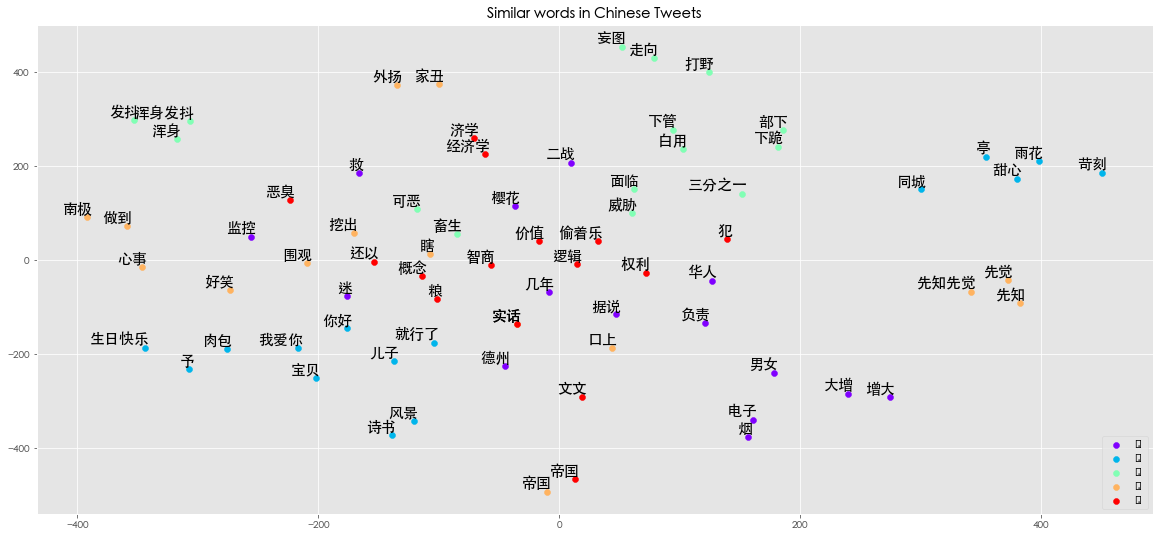

In [72]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')#ignore the warning
plt.rcParams['font.family'] = ['Heiti TC']

def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(20, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=1, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=15)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150)
    plt.show()


tsne_plot_similar_words('Similar words in Chinese Tweets', keys, embeddings_en_2d, word_clusters, 1,
                        'ch_similar_words.png')